# Titanic: 생존자 예측하기
- Defining the problem statement (문제 설명 정의)
- Collecting the data (데이터 수집)
- Exploratory data analysis (탐색적 데이터 분석)
- Feature engineering (피쳐 엔지니어링)
- Modelling (모델링)
- Testing (테스트)

### 1. 문제 정의

In [675]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

### 2. 데이터

In [676]:
import pandas as pd

# 학습에 사용할 데이터 => 모델 생성
train = pd.read_csv(
    './data/titanic/train.csv'
)

# 모델 검증 사용할 데이터
test = pd.read_csv(
    './data/titanic/test.csv'
)

### 3. 탐색적 데이터 분석 (Exploratory data analysis, EDA)

In [677]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [678]:
num = 1    
class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
class_cnt = train[train['Pclass']==num]['Cabin'].count()

class_sum = class_nan + class_cnt
class_rat = class_nan / class_sum

class_nan, class_cnt, class_sum, class_rat

(40, 176, 216, 0.18518518518518517)

In [679]:
def class_ratio(num):
    class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
    class_cnt = train[train['Pclass']==num]['Cabin'].count()
    class_sum = class_nan + class_cnt
    class_rat = class_nan / class_sum
    print(num, '등칸 NaN 비율 : {0:.4f}'.format(class_rat))

class_ratio(1), class_ratio(2), class_ratio(3)    

1 등칸 NaN 비율 : 0.1852
2 등칸 NaN 비율 : 0.9130
3 등칸 NaN 비율 : 0.9756


(None, None, None)

#### Data Dictionary (891개 행과 12개 열)
- Survived (생존여부) : 0 = No, 1 = Yes 
- pclass : Ticket class 1, 2, 3
- sibsp : 탑승한 형제자매 / 배우자 수
- parch : 탑승한 부모 / 자식 수
- ticket : 티켓 번호
- cabin (객실) : 객실 번호
- embarked (선착장) : C = Cherbourg, Q = Queenstown, S = Southampton

In [680]:
# 구조 파악
train.shape, test.shape

((891, 12), (418, 11))

In [681]:
# test dataset에는 생존 여부 데이터가 없음
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [682]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [683]:
# 결측치 확인
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

## 데이터 시각화

##### import python lib for visualization (시각화를 위해 python lib 가져오기)

In [684]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

##### Bar Chart for Categorical Features (범주형 피쳐에 대한 막대 차트) : 생존 관련성
- Pclass
- Sex
- SibSp (형제자매 및 배우자 수)
- Parch (부모 및 자녀 수)
- Embarked
- Cabin

In [685]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [686]:
# pclass vs. survived
survived = train[train['Survived']==1]['Pclass'].value_counts()
dead = train[train['Survived']==0]['Pclass'].value_counts()
survived, dead

(Pclass
 1    136
 3    119
 2     87
 Name: count, dtype: int64,
 Pclass
 3    372
 2     97
 1     80
 Name: count, dtype: int64)

In [687]:
df = pd.DataFrame([survived, dead])
df.index = ['Survived','Dead']
df

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


<Axes: >

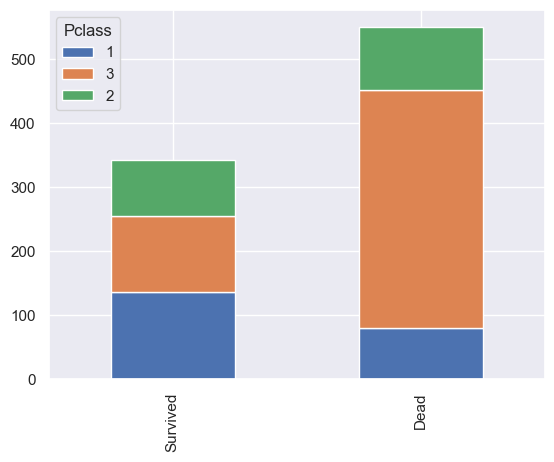

In [688]:
df.plot(kind='bar', stacked=True)

<Axes: >

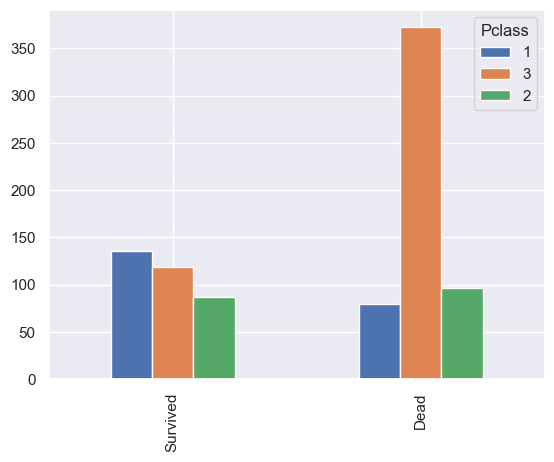

In [689]:
df.plot(kind='bar', stacked=False)

In [690]:
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()
survived, dead

(Sex
 female    233
 male      109
 Name: count, dtype: int64,
 Sex
 male      468
 female     81
 Name: count, dtype: int64)

In [691]:
df = pd.DataFrame([survived,dead])
df

Sex,female,male
count,233,109
count,81,468


In [692]:
df.index = ['Survived','Dead']
df

Sex,female,male
Survived,233,109
Dead,81,468


In [693]:
# Function
def bar_chart(feature):
    '''
    desc : 특정 변수들의 생존 관련성 시각화

    parameter :
    feature : 컬럼 => Pclass, Sex, SibSp, Parch, Embarked, Cabin
    '''
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True)

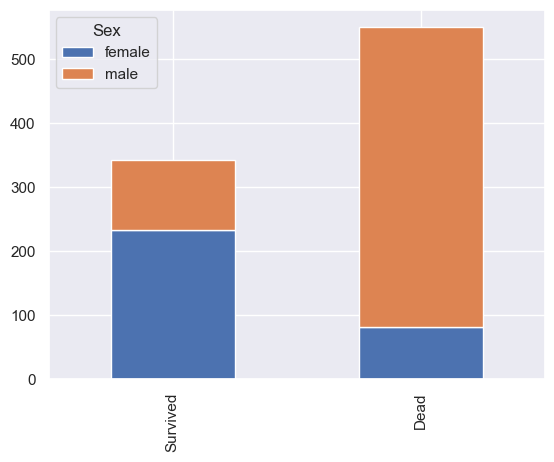

In [694]:
bar_chart('Sex') # 여성들이 남성들보다 높은 생존 확률

In [695]:
survived = train[train['Survived']==1]['Pclass'].value_counts()
dead = train[train['Survived']==0]['Pclass'].value_counts()
survived, dead

(Pclass
 1    136
 3    119
 2     87
 Name: count, dtype: int64,
 Pclass
 3    372
 2     97
 1     80
 Name: count, dtype: int64)

In [696]:
df = pd.DataFrame([survived,dead])
df

Pclass,1,3,2
count,136,119,87
count,80,372,97


In [697]:
df.index = ['Survived','Dead']
df

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


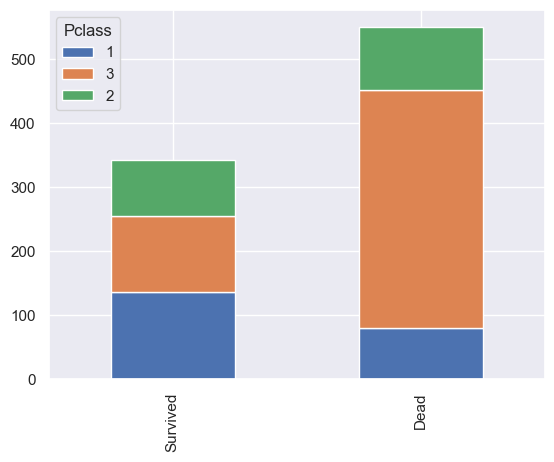

In [698]:
bar_chart('Pclass') # pclass에 따라 생존률이 차이가 있음

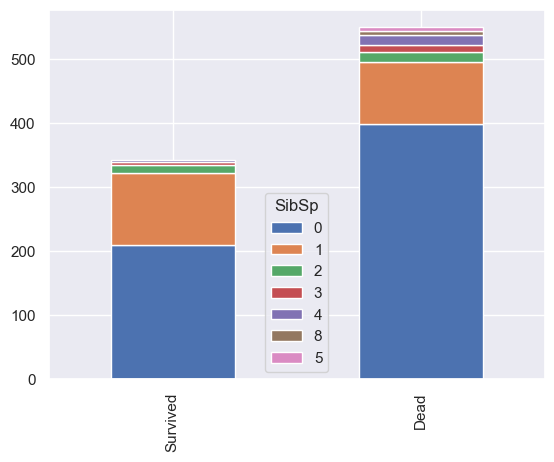

In [699]:
bar_chart('SibSp') # 가족이 없는 경우 생존율이 떨어짐

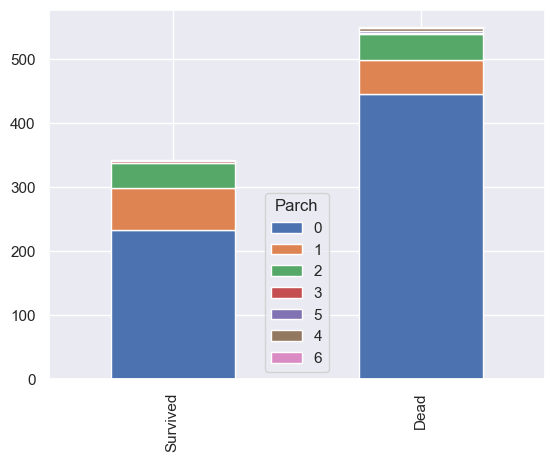

In [700]:
bar_chart('Parch') # 부모님이나 자식이 있을 경우 생존률이 높음

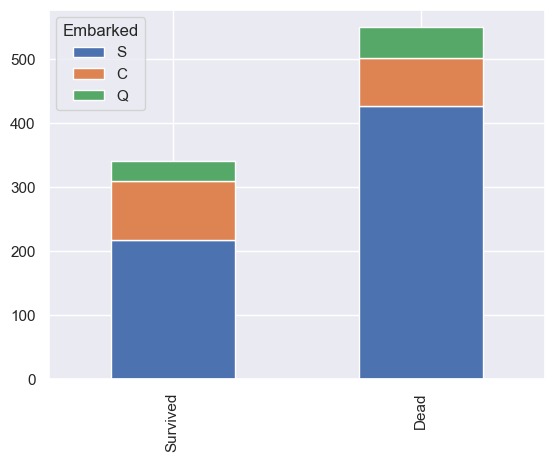

In [701]:
bar_chart('Embarked') # 선착장의 경우 생존률에 영향이 없는 것 같음

In [702]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [703]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

### 4. 데이터 정제, 전처리 : 특징 처리

#### 4.1 titanic 침몰 상태

In [704]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [705]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [706]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4.2 Name (Mr, Miss, Mrs 추출)

In [707]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [708]:
train['Name'].str.extract('([A-Za-z]+)\.').head()

## '([A-Za-z]+)\.'  :정규표현식
## 대문자 A-Z로 시작하면서 소문자 a-z가 여러개이면서 마침표 .로 끝나는 것 추출
## 예로, Braund, Mr. Owen Harris 에서 Mr 를 추출한다는 말

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [709]:
train['Name'].str.extract('([A-Za-z]+)\.', expand=False).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [710]:
# 데이터 전처리 주의 사항 : train data, test data 동시 전처리
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

    # train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    # train['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [711]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [712]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [713]:
dataset['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [714]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [715]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [716]:
# Title map - Mr : 0, Miss : 1, Mrs: 2, Others: 3

title_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3
    ,"Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 
}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [717]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [718]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


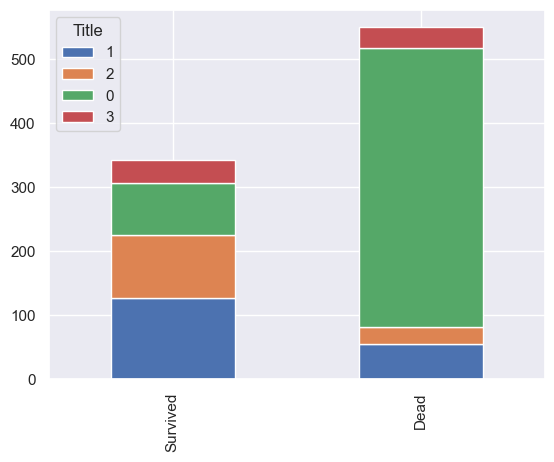

In [719]:
bar_chart('Title')

In [720]:
# # Name => Title 추출, Name del
# 불필요 Name 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [721]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [722]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [723]:
# Sex => Featurn
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### 4.3 Sex

In [724]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

    # train['Sex'] = train['Sex'].map(sex_mapping)    
    # test['Sex'] = test['Sex'].map(sex_mapping)

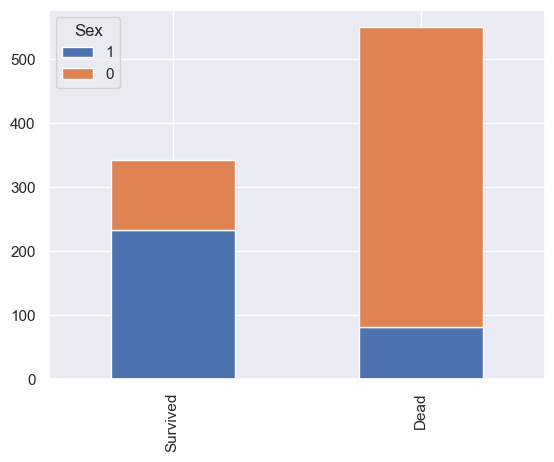

In [725]:
bar_chart('Sex')

##### 4.4 나이
##### 4.4.1 일부 나이 누락에 median 나이 사용

In [726]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [727]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,0,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,1,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,0,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,1,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,0,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,1,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,0,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,0,NaN,0,0,349217,7.8958,NaN,S,0


In [728]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [729]:
# Age => Missing Value => Title's Age median (Mr, Mrs, Miss, 기타) => fillna
train["Age"].fillna(
    train.groupby("Title")["Age"].transform("median")
    , inplace=True
)

test["Age"].fillna(
    test.groupby("Title")["Age"].transform("median")
    , inplace=True
) # inplace=True => return None 

In [730]:
train.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0


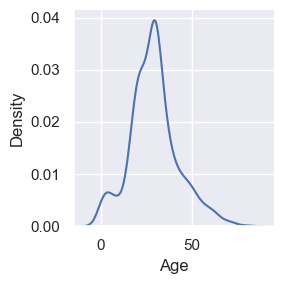

In [731]:
facet = sns.FacetGrid(train) # object create
facet.map(sns.kdeplot,'Age') # 데이터와 차트 연동
plt.show()

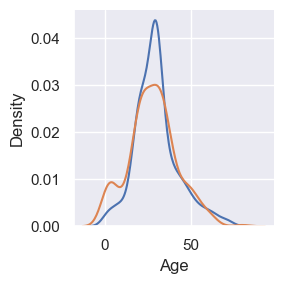

In [732]:
facet = sns.FacetGrid(train, hue="Survived") # object create
facet.map(sns.kdeplot,'Age') # 데이터와 차트 연동
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


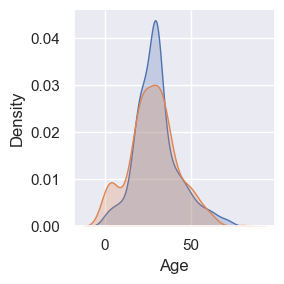

In [733]:
facet = sns.FacetGrid(train, hue="Survived") # object create
facet.map(sns.kdeplot,'Age',shade= True) # 데이터와 차트 연동
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


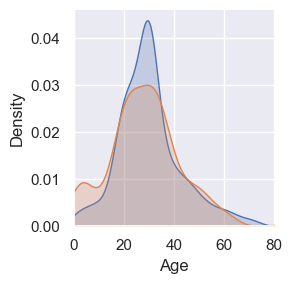

In [734]:
facet = sns.FacetGrid(train, hue="Survived") # object create
facet.map(sns.kdeplot,'Age',shade= True) # 데이터와 차트 연동
facet.set(xlim=(0, train['Age'].max()))

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


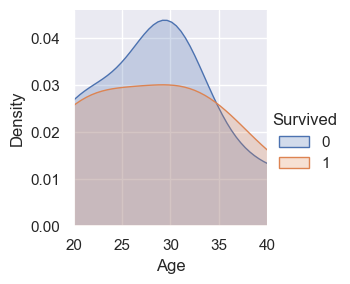

In [735]:
facet = sns.FacetGrid(train, hue="Survived") # object create
facet.map(sns.kdeplot,'Age',shade= True) # 데이터와 차트 연동
facet.set(xlim=(20, 40))
facet.add_legend()
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


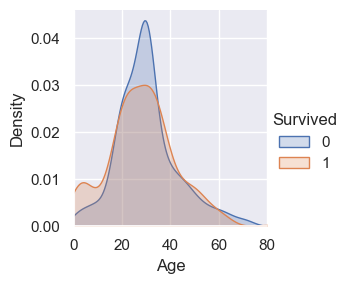

In [736]:
facet = sns.FacetGrid(train, hue="Survived") # object create
facet.map(sns.kdeplot,'Age',shade= True) # 데이터와 차트 연동
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


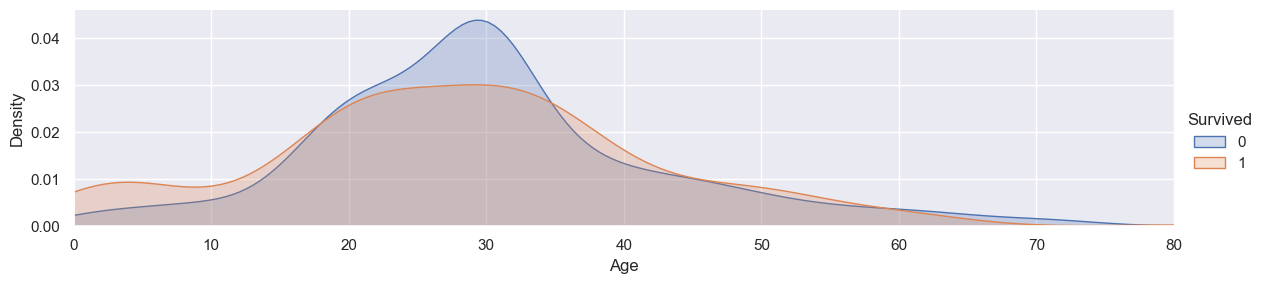

In [737]:
# 나이에 대한 시각화
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # object create
facet.map(sns.kdeplot,'Age',shade= True) # 데이터와 차트 연동
facet.set(xlim=(0, train['Age'].max())) # X 축 범위
facet.add_legend() # 범례
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


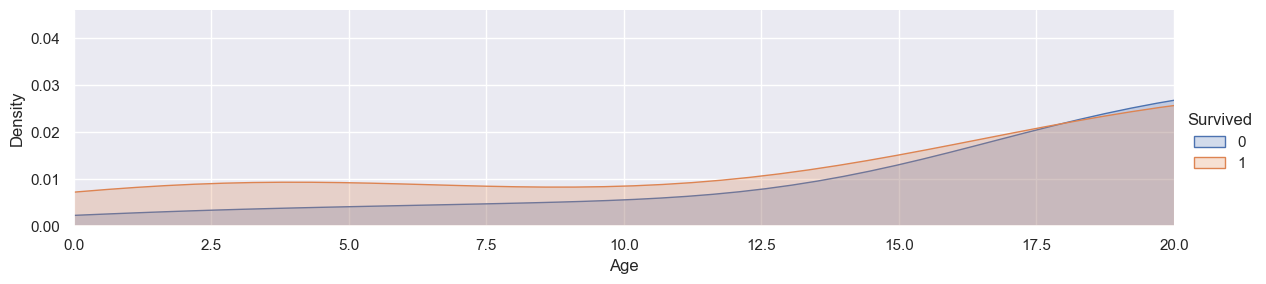

In [738]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # object create
facet.map(sns.kdeplot,'Age',shade= True) # 데이터와 차트 연동
facet.set(xlim=(0, 20))
facet.add_legend()
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

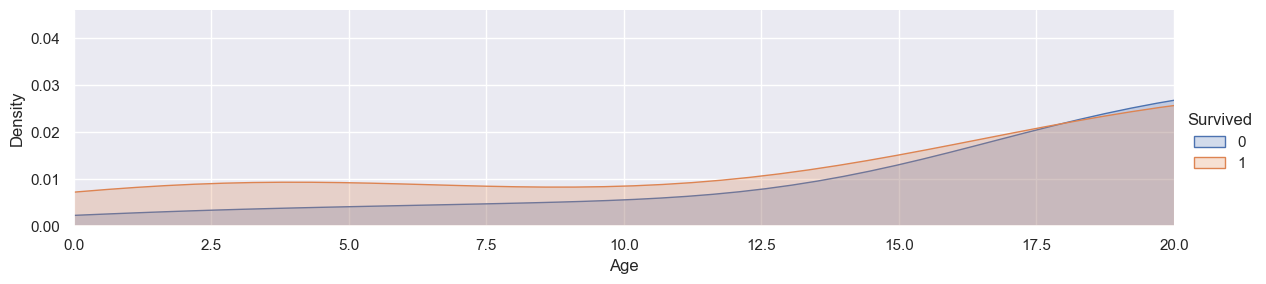

In [739]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 30.0)

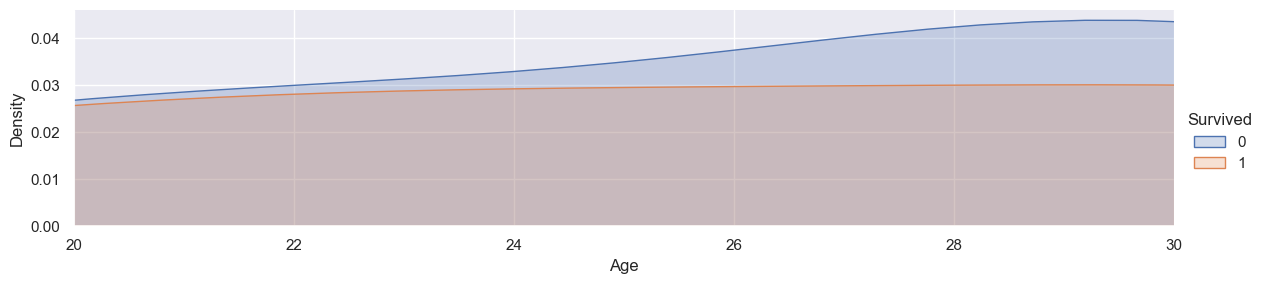

In [740]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 40.0)

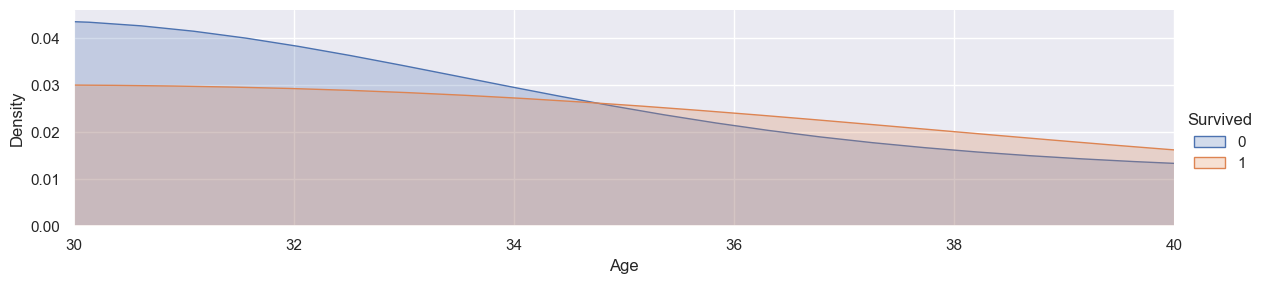

In [741]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(40.0, 60.0)

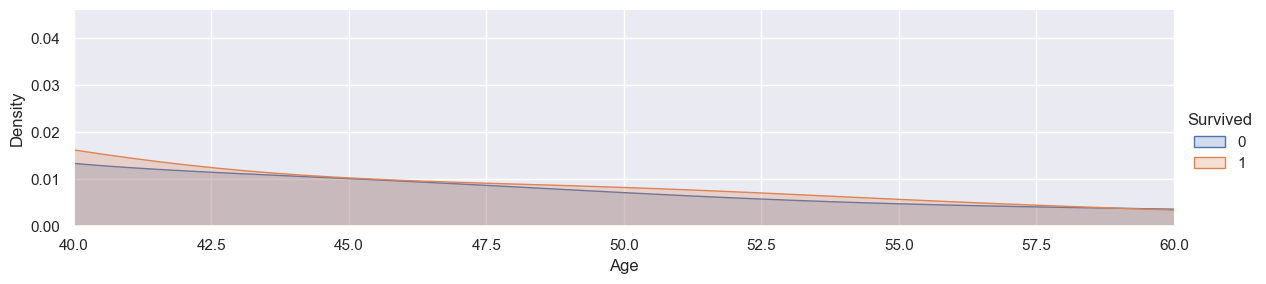

In [742]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(60.0, 80.0)

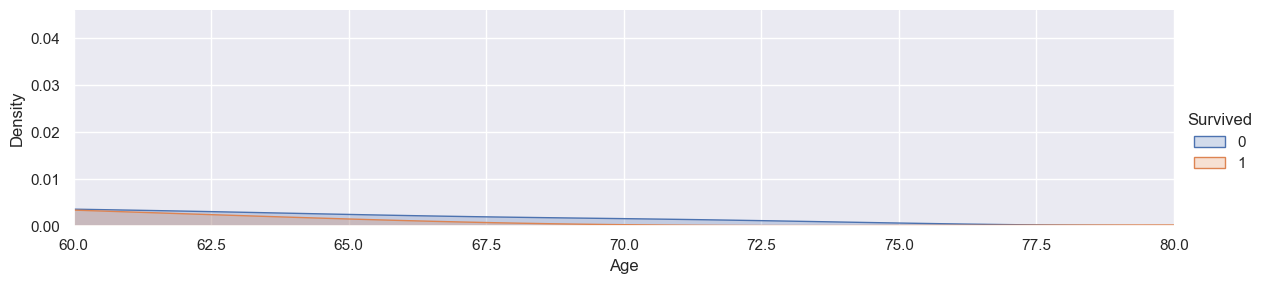

In [743]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [744]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

##### 4.4.2 Binning
- feature vector map: 
- child : 0, 0세~16세
- young : 1, 16< <=26
- adult : 2, 26< <=36
- mid-age : 3, 36< <= 62
- senior : 4, <62

In [745]:
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,28.5,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,28.5,0,0,359309,8.0500,NaN,S,0


In [746]:
train_cp = train.copy()
train_cp.loc[train_cp['Age'] <= 16]['Age']

7       2.0
9      14.0
10      4.0
14     14.0
16      2.0
       ... 
850     4.0
852     9.0
853    16.0
869     4.0
875    15.0
Name: Age, Length: 105, dtype: float64

In [747]:
train_cp = train.copy()
train_cp.loc[train_cp['Age'] <= 16, 'Age'] = 0 
train_cp.loc[train_cp['Age'] <= 16, 'Age']

7      0.0
9      0.0
10     0.0
14     0.0
16     0.0
      ... 
850    0.0
852    0.0
853    0.0
869    0.0
875    0.0
Name: Age, Length: 105, dtype: float64

In [748]:
train_cp = train.copy()
# train_cp.loc[train_cp['Age'] <= 16, 'Age'] = 0
train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26), 'Age'] = 1
# train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26), 'Age']
train_cp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [749]:
train_cp = train.copy()
# train_cp.loc[train_cp['Age'] <= 16, 'Age'] = 0
train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26), 'Age'] = 1
# train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26), 'Age']
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,NaN,S,0


In [750]:
train_cp = train.copy()
train_cp.loc[train_cp['Age'] <= 16, 'Age'] = 0
train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26), 'Age'] = 1
train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36), 'Age'] = 2
train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62), 'Age'] = 3
train_cp.loc[train_cp['Age'] > 62, 'Age'] = 4
train_cp['Age'].value_counts()

Age
2.0    336
1.0    255
3.0    180
0.0    105
4.0     15
Name: count, dtype: int64

In [751]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
dataset['Age'].value_counts()

Age
2.0    139
1.0    134
3.0     99
0.0     39
4.0      7
Name: count, dtype: int64

In [752]:
train['Age'].value_counts(), test['Age'].value_counts()

(Age
 2.0    336
 1.0    255
 3.0    180
 0.0    105
 4.0     15
 Name: count, dtype: int64,
 Age
 2.0    139
 1.0    134
 3.0     99
 0.0     39
 4.0      7
 Name: count, dtype: int64)

In [753]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


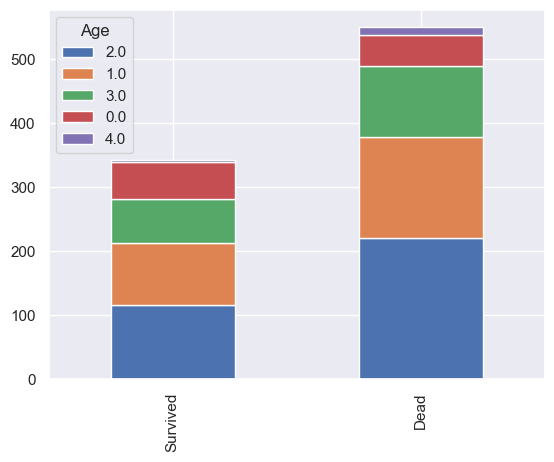

In [754]:
bar_chart('Age')

#### 4.5 Embarked(선착장)
##### 4.5.1 결측값(missing values) 채우기

In [755]:
# Embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,1,3.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,1,3.0,0,0,113572,80.0,B28,NaN,2


In [756]:
train[train['Pclass']==1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
11,12,1,1,1,3.0,0,0,113783,26.5500,C103,S,1
23,24,1,1,0,2.0,0,0,113788,35.5000,A6,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,1,3.0,1,1,11751,52.5542,D35,S,2
872,873,0,1,0,2.0,0,0,695,5.0000,B51 B53 B55,S,0
879,880,1,1,1,3.0,0,1,11767,83.1583,C50,C,2
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1


In [757]:
train[train['Pclass']==1]['Embarked']

1      C
3      S
6      S
11     S
23     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 216, dtype: object

In [758]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
Pclass1, Pclass2, Pclass3

(Embarked
 S    127
 C     85
 Q      2
 Name: count, dtype: int64,
 Embarked
 S    164
 C     17
 Q      3
 Name: count, dtype: int64,
 Embarked
 S    353
 Q     72
 C     66
 Name: count, dtype: int64)

In [759]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df

Embarked,S,C,Q
count,127,85,2
count,164,17,3
count,353,66,72


In [760]:
df.index = ['1st class','2nd class', '3rd class']
df

Embarked,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


<Axes: >

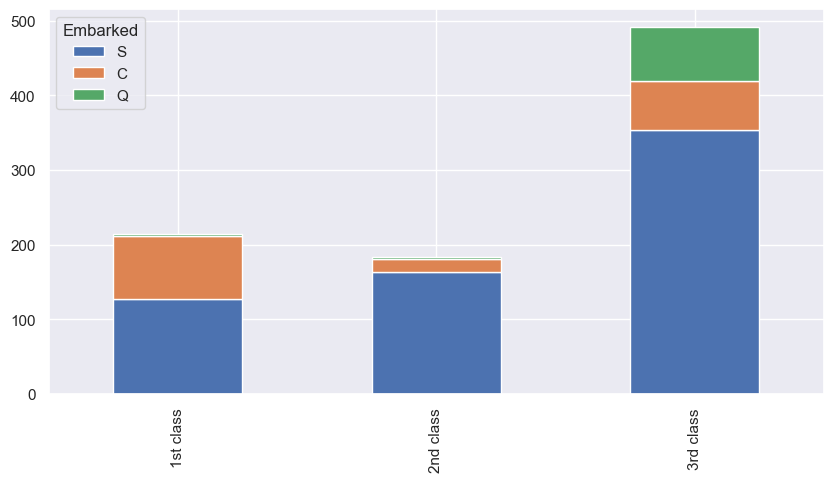

In [761]:
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [762]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [763]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [764]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [765]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [766]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [767]:
# Embarked value : string => number
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# train['Embarked'] = train['Embarked'].map(embarked_mapping)
# test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [768]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### 4.6 Fare (티켓가격)

In [769]:
test['Fare'].isnull().sum()

1

In [770]:
train["Fare"].fillna(
      train.groupby("Pclass")["Fare"].transform("median")
    , inplace=True
)

test['Fare'].isnull().sum()

1

In [771]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title            int64
dtype: object

In [772]:
# 누락 요금을 각 P 클래스 중앙 요금으로 채움
train["Fare"].fillna(
      train.groupby("Pclass")["Fare"].transform("median")
    , inplace=True
)

test["Fare"].fillna(
      test.groupby("Pclass")["Fare"].transform("median")
    , inplace=True
)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


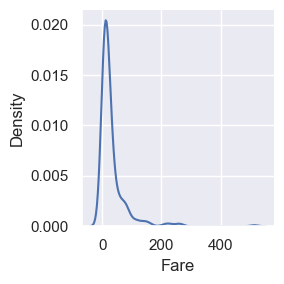

In [773]:
facet = sns.FacetGrid(train)
facet.map(sns.kdeplot,'Fare')
plt.show()

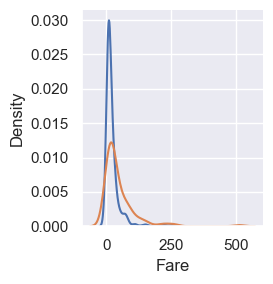

In [774]:
facet = sns.FacetGrid(train, hue="Survived")
facet.map(sns.kdeplot,'Fare')
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


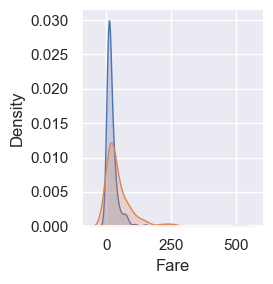

In [775]:
facet = sns.FacetGrid(train, hue="Survived")
facet.map(sns.kdeplot,'Fare',shade= True)
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


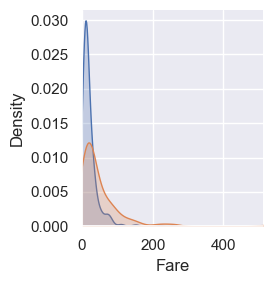

In [776]:
facet = sns.FacetGrid(train, hue="Survived")
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


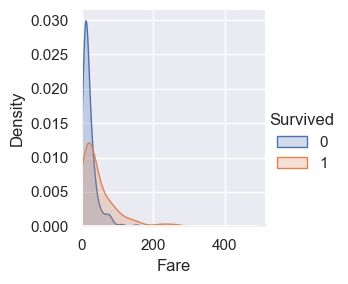

In [777]:
facet = sns.FacetGrid(train, hue="Survived")
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


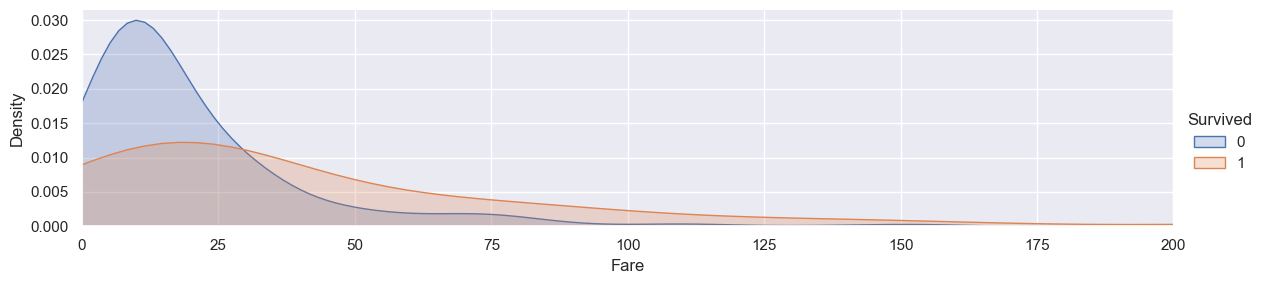

In [778]:
# Fare Categorical
facet = sns.FacetGrid(
      train # DateFrame 
    , hue="Survived" # 비교 조건
    , aspect=4
)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 200)
plt.show()

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

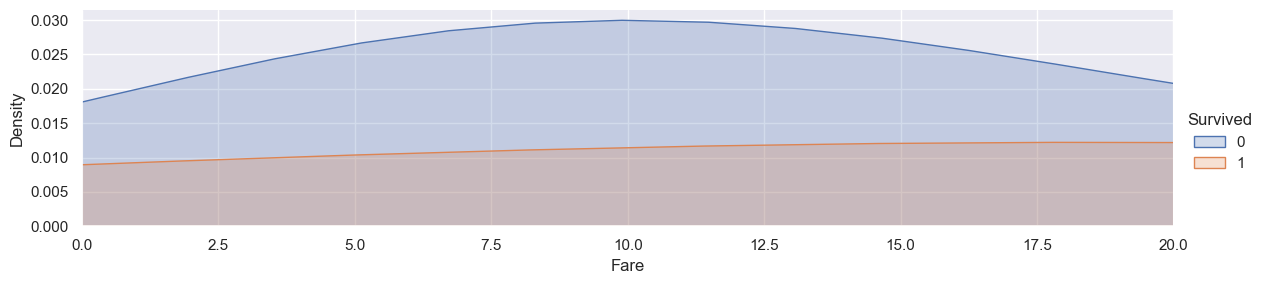

In [779]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 30.0)

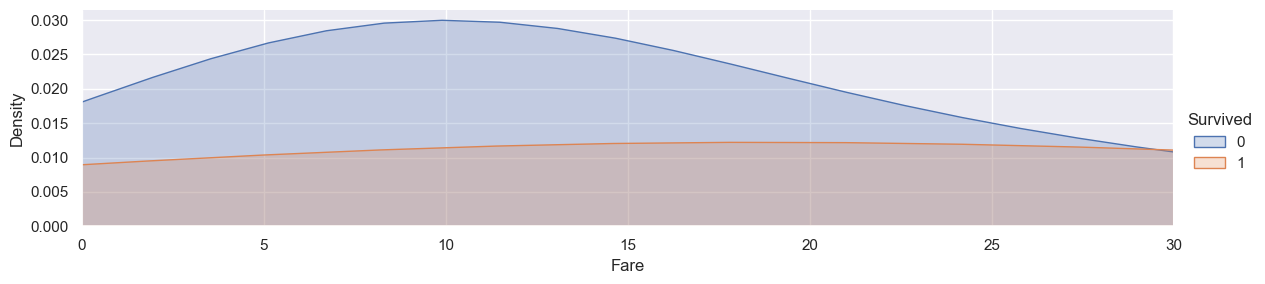

In [780]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 512.3292)

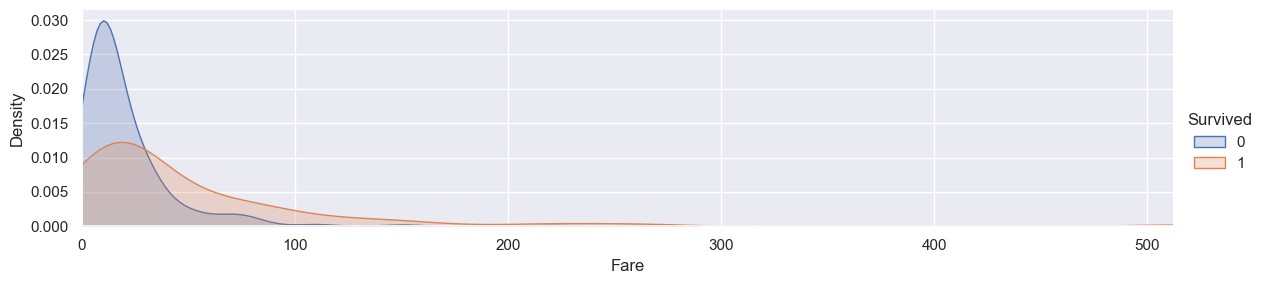

In [781]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [782]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,1,0


In [783]:
test.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
test.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
test.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
test.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [784]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


In [785]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [786]:
dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


#### 4.7 Cabin (객실)

In [787]:
train.Cabin.value_counts()
# train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [788]:
train.Cabin.str

In [789]:
train.Cabin.str[0].head(20)

0     NaN
1       C
2     NaN
3       C
4     NaN
5     NaN
6       E
7     NaN
8     NaN
9     NaN
10      G
11      C
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Cabin, dtype: object

In [790]:
train.Cabin.str[:1].head(10)

0    NaN
1      C
2    NaN
3      C
4    NaN
5    NaN
6      E
7    NaN
8    NaN
9    NaN
Name: Cabin, dtype: object

In [791]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [792]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [793]:
train[train['Pclass']==1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
6,7,0,1,0,3.0,0,0,17463,2.0,E,0,0
11,12,1,1,1,3.0,0,0,113783,1.0,C,0,1
23,24,1,1,0,2.0,0,0,113788,2.0,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,1,3.0,1,1,11751,2.0,D,0,2
872,873,0,1,0,2.0,0,0,695,0.0,B,0,0
879,880,1,1,1,3.0,0,1,11767,2.0,C,1,2
887,888,1,1,1,1.0,0,0,112053,1.0,B,0,1


In [794]:
train[train['Pclass']==1].value_counts()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Ticket    Fare  Cabin  Embarked  Title
2            1         1       1    3.0  1      0      PC 17599  2.0   C      1         2        1
4            1         1       1    2.0  1      0      113803    2.0   C      0         2        1
584          0         1       0    2.0  0      0      13049     2.0   A      1         0        1
586          1         1       1    1.0  0      2      110413    2.0   E      0         1        1
588          1         1       0    3.0  1      1      13567     2.0   B      1         0        1
                                                                                                ..
332          0         1       0    3.0  0      0      113043    1.0   C      0         0        1
333          0         1       0    3.0  0      1      PC 17582  3.0   C      0         0        1
337          0         1       0    2.0  1      0      113776    2.0   C      0         0        1
338          1 

In [795]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
Pclass1, Pclass2, Pclass3

(Cabin
 C    59
 B    47
 D    29
 E    25
 A    15
 T     1
 Name: count, dtype: int64,
 Cabin
 F    8
 D    4
 E    4
 Name: count, dtype: int64,
 Cabin
 F    5
 G    4
 E    3
 Name: count, dtype: int64)

In [796]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df

Cabin,C,B,D,E,A,T,F,G
count,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
count,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
count,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


In [797]:
df.index = ['1st class','2nd class', '3rd class']
df

Cabin,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


<Axes: >

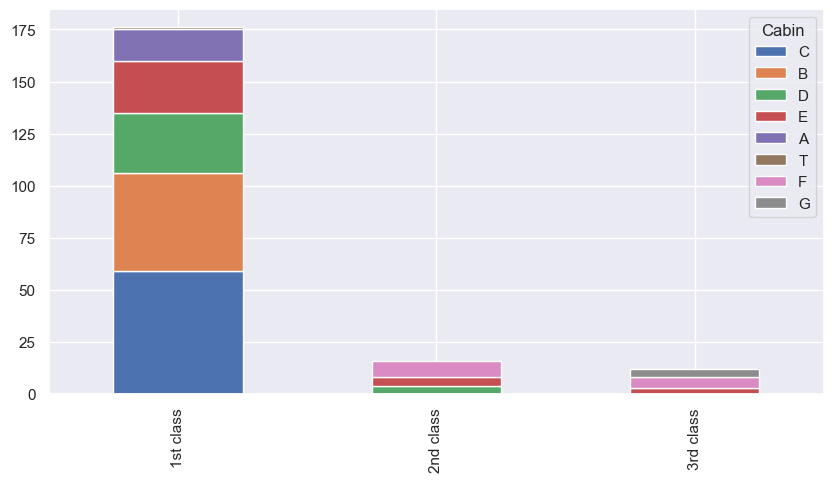

In [798]:
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [799]:
cabin_mapping = {
    "A": 0, "B": 0.4, "C": 0.8, "D": 1.2, 
    "E": 1.6, "F": 2, "G": 2.4, "T": 2.8
}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,1,3.0,0,0,PC 17758,0.0,0.8,1,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,0


#### 4.8 FamilySize (가족의 크기)

In [800]:
# # fillna
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(
    train.groupby("Pclass")["Cabin"].transform("median")
    , inplace=True
)

test["Cabin"].fillna(
    test.groupby("Pclass")["Cabin"].transform("median")
    , inplace=True
)

In [801]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [802]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3,1
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1,4
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0,1


c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\judai\anaconda3\envs\pandas_dev\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

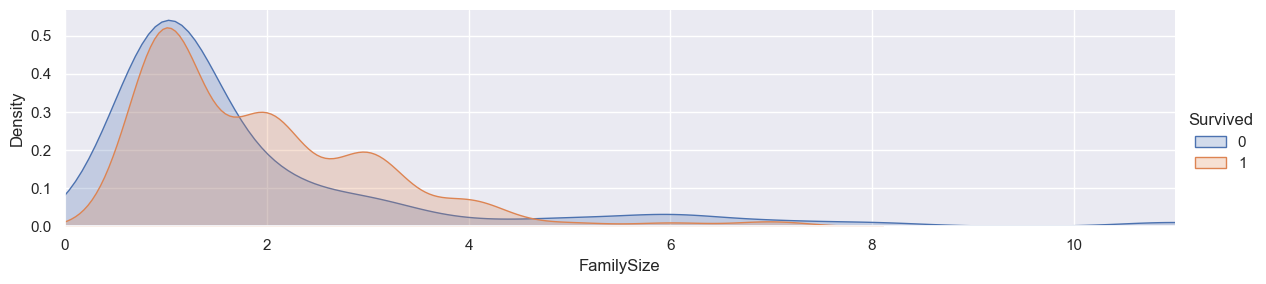

In [803]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [804]:
family_mapping = {
      1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2.0
    , 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4.0
}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [805]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [806]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)
train_data = train.drop('Survived', axis=1)

target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [807]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


### 5. Modelling

In [808]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance

In [809]:
# 1. kNN
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = KNeighborsClassifier() 
# clf = KNeighborsClassifier(n_neighbors = 13) # Model object
scoring = 'accuracy' # 평가지표 : 정확도
# error_score='debug'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# print(score.mean())
print(round(np.mean(score)*100, 2))

clf = KNeighborsClassifier()
# clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

81.93


In [810]:
# 2. Decision Tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100, 2))

clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

79.46


In [811]:
# 3 Ramdom Forest
clf = RandomForestClassifier()
# clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100, 2))

clf = RandomForestClassifier()
# clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

81.26


In [812]:
# 4 Naive Bayes
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100, 2))

clf = GaussianNB()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

78.78


In [813]:
# 5 SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100,2))

clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

83.5


In [814]:
# 6 LogisticRegression
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100, 2))

clf = LogisticRegression()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

81.26


In [815]:
# 7 XGBoost
clf = XGBClassifier()
# clf = XGBClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100, 2))

clf = XGBClassifier()
# clf = XGBClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

82.6


In [816]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
